In [2]:
df = pd.read_csv('data_processed.csv', index_col=0)

In [3]:
features

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

In [4]:
data = df[features]

In [5]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:, 0].std()

1.0

In [6]:
np.save('training_data.npy', data)

In [7]:
pca = PCA(n_components=2)
res_pca = pca.fit_transform(data)

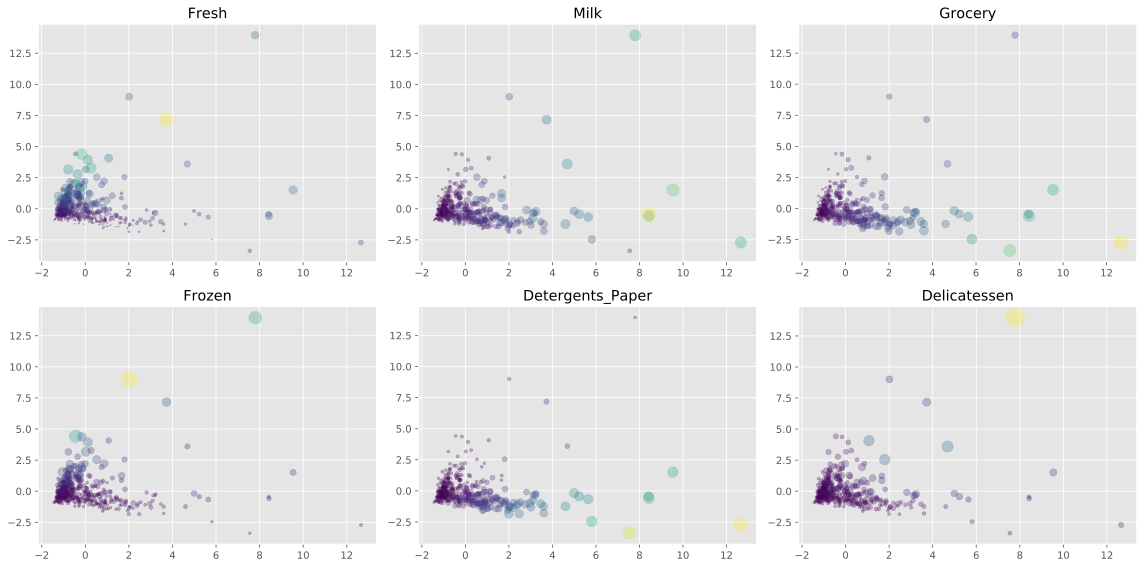

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_pca[:, 0], res_pca[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

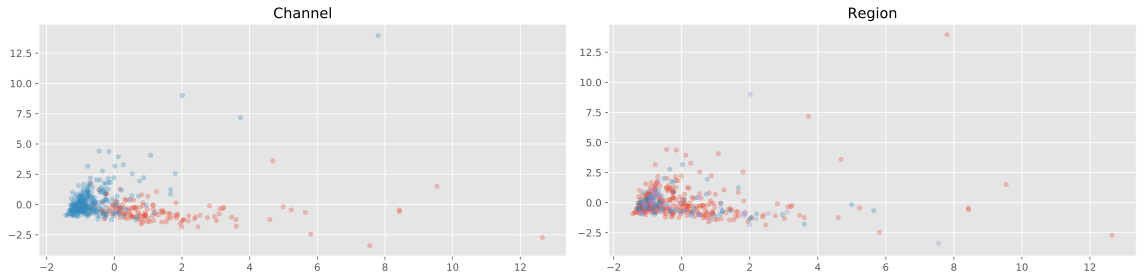

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_pca[df[feature]==unique_val, 0], res_pca[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()